In [1]:
%%time
import numpy as np
import pandas as pd 

x_train_reduced = pd.read_csv('x_train_reduced.csv')
x_test_reduced = pd.read_csv('x_test_reduced.csv')
y_train2 = pd.read_csv('y_train2.csv')



CPU times: user 2min 10s, sys: 7.15 s, total: 2min 17s
Wall time: 2min 15s


<string>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.


In [2]:
%%time
x_train_reduced = x_train_reduced.loc[:, ~x_train_reduced.columns.str.contains('^Unnamed')]
x_test_reduced = x_test_reduced.loc[:, ~x_test_reduced.columns.str.contains('^Unnamed')]


CPU times: user 687 ms, sys: 684 ms, total: 1.37 s
Wall time: 1.37 s


In [3]:
%%time
y_train3 = y_train2.drop(labels=['fullVisitorId'], axis=1)

CPU times: user 3.49 ms, sys: 209 µs, total: 3.69 ms
Wall time: 3.65 ms


In [4]:
%%time
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Input
from keras.models import Model

Using TensorFlow backend.


CPU times: user 1.03 s, sys: 188 ms, total: 1.22 s
Wall time: 1.27 s


In [5]:
%%time

print(x_train_reduced.shape)
print(y_train3.shape)


(1323730, 290)
(1323730, 1)
CPU times: user 191 µs, sys: 12 µs, total: 203 µs
Wall time: 146 µs


In [6]:
X_train, X_val, y_train, y_val = train_test_split(x_train_reduced, y_train3, test_size=0.15, random_state=666)

In [7]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(1125170, 290)
(198560, 290)
(1125170, 1)
(198560, 1)


In [8]:
# reshape input to be [samples, time steps, features] 
# trainX = np.reshape(X_train, (X_train.shape[0], 1, X_val.shape[1])) 
# testX = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_train = X_train.values
X_val = X_val.values
y_train = y_train.values
y_val = y_val.values
X_train = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
X_val = X_val.reshape(X_val.shape[0],1,X_val.shape[1])

In [9]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(1125170, 1, 290)
(198560, 1, 290)
(1125170, 1)
(198560, 1)


In [10]:
validation_RMSE = []
train_RMSE = []

In [11]:
%%time



inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(200,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(120,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model2 = Model(inputs=inputs, outputs=output)
model2.compile(loss='mse', optimizer='adam')
model2.fit(X_train, y_train, epochs=4, batch_size=64, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/4
1125170/1125170 [==============================] - 274s 244us/step - loss: 0.4088 - val_loss: 0.3132
Epoch 2/4
1125170/1125170 [==============================] - 270s 240us/step - loss: 0.2363 - val_loss: 0.2195
Epoch 3/4
1125170/1125170 [==============================] - 268s 238us/step - loss: 0.1888 - val_loss: 0.2036
Epoch 4/4
1125170/1125170 [==============================] - 266s 237us/step - loss: 0.1601 - val_loss: 0.2483
CPU times: user 24min 21s, sys: 3min 56s, total: 28min 18s
Wall time: 18min 3s


In [12]:
%%time
y_pred_train2 = model2.predict(X_train)
y_pred_val2 = model2.predict(X_val)

RMSE_val2 = np.sqrt(mean_squared_error(y_val, y_pred_val2))
RMSE_train2 = np.sqrt(mean_squared_error(y_train, y_pred_train2))

validation_RMSE.append(RMSE_val2)
train_RMSE.append(RMSE_train2)
print(f"LSTM: RMSE val: {RMSE_val2}  - RMSE train: {RMSE_train2}")

LSTM: RMSE val: 0.498263463600939  - RMSE train: 0.44492003342182757
CPU times: user 2min 34s, sys: 25.1 s, total: 2min 59s
Wall time: 2min 4s


In [13]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(200,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(120,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model3 = Model(inputs=inputs, outputs=output)
model3.compile(loss='mse', optimizer='adam')
model3.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/10
1125170/1125170 [==============================] - 272s 242us/step - loss: 0.3997 - val_loss: 0.2804
Epoch 2/10
1125170/1125170 [==============================] - 267s 238us/step - loss: 0.2373 - val_loss: 0.1936
Epoch 3/10
1125170/1125170 [==============================] - 266s 237us/step - loss: 0.1909 - val_loss: 0.1977
Epoch 4/10
1125170/1125170 [==============================] - 266s 236us/step - loss: 0.1678 - val_loss: 0.2167
Epoch 5/10
1125170/1125170 [==============================] - 261s 232us/step - loss: 0.1482 - val_loss: 0.1941
Epoch 6/10
1125170/1125170 [==============================] - 256s 228us/step - loss: 0.1374 - val_loss: 0.1583
Epoch 7/10
1125170/1125170 [==============================] - 256s 227us/step - loss: 0.1208 - val_loss: 0.1558
Epoch 8/10
1125170/1125170 [==============================] - 256s 227us/step - loss: 0.1136 - val_loss: 0.1568
Epoch 9/10
1125170/1125170 [=======================

In [14]:
%%time
y_pred_train3 = model3.predict(X_train)
y_pred_val3 = model3.predict(X_val)

RMSE_val3 = np.sqrt(mean_squared_error(y_val, y_pred_val3))
RMSE_train3 = np.sqrt(mean_squared_error(y_train, y_pred_train3))

validation_RMSE.append(RMSE_val3)
train_RMSE.append(RMSE_train3)
print(f"LSTM: RMSE val: {RMSE_val3}  - RMSE train: {RMSE_train3}")


LSTM: RMSE val: 0.4187457246850832  - RMSE train: 0.31612219724609214
CPU times: user 2min 29s, sys: 24.9 s, total: 2min 54s
Wall time: 2min 2s


In [15]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(200,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(120,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model4 = Model(inputs=inputs, outputs=output)
model4.compile(loss='mse', optimizer='adam')
model4.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/20
1125170/1125170 [==============================] - 267s 237us/step - loss: 0.4081 - val_loss: 0.2702
Epoch 2/20
1125170/1125170 [==============================] - 263s 234us/step - loss: 0.2360 - val_loss: 0.2291
Epoch 3/20
1125170/1125170 [==============================] - 263s 234us/step - loss: 0.1900 - val_loss: 0.1955
Epoch 4/20
1125170/1125170 [==============================] - 263s 234us/step - loss: 0.1607 - val_loss: 0.1729
Epoch 5/20
1125170/1125170 [==============================] - 263s 234us/step - loss: 0.1412 - val_loss: 0.2135
Epoch 6/20
1125170/1125170 [==============================] - 263s 234us/step - loss: 0.1357 - val_loss: 0.1707
Epoch 7/20
1125170/1125170 [==============================] - 263s 234us/step - loss: 0.1215 - val_loss: 0.1693
Epoch 8/20
1125170/1125170 [==============================] - 264s 234us/step - loss: 0.1141 - val_loss: 0.1586
Epoch 9/20
1125170/1125170 [=======================

In [16]:
%%time
y_pred_train_4 = model4.predict(X_train)
y_pred_val_4 = model4.predict(X_val)

validation_RMSE.append(np.sqrt(mean_squared_error(y_val, y_pred_val_4)))
train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_pred_train_4)))
print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val_4))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train_4))}")

LSTM: RMSE val: 0.3886240025879879  - RMSE train: 0.2709763217969909
CPU times: user 2min 31s, sys: 24.9 s, total: 2min 56s
Wall time: 2min 3s


In [17]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(200,recurrent_dropout=0.4, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(120,recurrent_dropout=0.4, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model5 = Model(inputs=inputs, outputs=output)
model5.compile(loss='mse', optimizer='adam')
model5.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/10
1125170/1125170 [==============================] - 269s 239us/step - loss: 0.4115 - val_loss: 0.2646
Epoch 2/10
1125170/1125170 [==============================] - 264s 235us/step - loss: 0.2364 - val_loss: 0.2231
Epoch 3/10
1125170/1125170 [==============================] - 258s 229us/step - loss: 0.1899 - val_loss: 0.1917
Epoch 4/10
1125170/1125170 [==============================] - 257s 229us/step - loss: 0.1651 - val_loss: 0.1866
Epoch 5/10
1125170/1125170 [==============================] - 257s 228us/step - loss: 0.1471 - val_loss: 0.1941
Epoch 6/10
1125170/1125170 [==============================] - 257s 229us/step - loss: 0.1350 - val_loss: 0.1737
Epoch 7/10
1125170/1125170 [==============================] - 257s 228us/step - loss: 0.1265 - val_loss: 0.1683
Epoch 8/10
1125170/1125170 [==============================] - 257s 229us/step - loss: 0.1166 - val_loss: 0.1591
Epoch 9/10
1125170/1125170 [=======================

In [18]:
%%time
y_pred_train_5 = model5.predict(X_train)
y_pred_val_5 = model5.predict(X_val)

validation_RMSE.append(np.sqrt(mean_squared_error(y_val, y_pred_val_5)))
train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_pred_train_5)))
print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val_5))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train_5))}")

LSTM: RMSE val: 0.40751301144298535  - RMSE train: 0.2975023635939494
CPU times: user 2min 31s, sys: 25.4 s, total: 2min 56s
Wall time: 2min 3s


In [19]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(200,recurrent_dropout=0.6, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(120,recurrent_dropout=0.6, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model6 = Model(inputs=inputs, outputs=output)
model6.compile(loss='mse', optimizer='adam')
model6.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/10
1125170/1125170 [==============================] - 268s 238us/step - loss: 0.4041 - val_loss: 0.2660
Epoch 2/10
1125170/1125170 [==============================] - 263s 234us/step - loss: 0.2272 - val_loss: 0.2156
Epoch 3/10
1125170/1125170 [==============================] - 262s 233us/step - loss: 0.1854 - val_loss: 0.2033
Epoch 4/10
1125170/1125170 [==============================] - 262s 233us/step - loss: 0.1637 - val_loss: 0.2065
Epoch 5/10
1125170/1125170 [==============================] - 262s 233us/step - loss: 0.1470 - val_loss: 0.1845
Epoch 6/10
1125170/1125170 [==============================] - 262s 233us/step - loss: 0.1342 - val_loss: 0.1775
Epoch 7/10
1125170/1125170 [==============================] - 263s 234us/step - loss: 0.1255 - val_loss: 0.2218
Epoch 8/10
1125170/1125170 [==============================] - 263s 233us/step - loss: 0.1139 - val_loss: 0.1625
Epoch 9/10
1125170/1125170 [=======================

In [20]:
%%time
y_pred_train_6 = model6.predict(X_train)
y_pred_val_6 = model6.predict(X_val)

validation_RMSE.append(np.sqrt(mean_squared_error(y_val, y_pred_val_6)))
train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_pred_train_6)))

print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val_6))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train_6))}")

LSTM: RMSE val: 0.4027132259646394  - RMSE train: 0.2781350547006209
CPU times: user 2min 32s, sys: 24.3 s, total: 2min 57s
Wall time: 2min 5s


In [21]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(180,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(100,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model7 = Model(inputs=inputs, outputs=output)
model7.compile(loss='mse', optimizer='adam')
model7.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/10
1125170/1125170 [==============================] - 266s 237us/step - loss: 0.4065 - val_loss: 0.2919
Epoch 2/10
1125170/1125170 [==============================] - 261s 232us/step - loss: 0.2329 - val_loss: 0.2824
Epoch 3/10
1125170/1125170 [==============================] - 261s 232us/step - loss: 0.1866 - val_loss: 0.2100
Epoch 4/10
1125170/1125170 [==============================] - 260s 231us/step - loss: 0.1629 - val_loss: 0.1711
Epoch 5/10
1125170/1125170 [==============================] - 261s 232us/step - loss: 0.1404 - val_loss: 0.1776
Epoch 6/10
1125170/1125170 [==============================] - 260s 231us/step - loss: 0.1347 - val_loss: 0.1714
Epoch 7/10
1125170/1125170 [==============================] - 261s 232us/step - loss: 0.1258 - val_loss: 0.1978
Epoch 8/10
1125170/1125170 [==============================] - 261s 232us/step - loss: 0.1155 - val_loss: 0.1626
Epoch 9/10
1125170/1125170 [=======================

In [22]:
%%time
y_pred_train_7 = model7.predict(X_train)
y_pred_val_7 = model7.predict(X_val)


validation_RMSE.append(np.sqrt(mean_squared_error(y_val, y_pred_val_7)))
train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_pred_train_7)))
print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val_7))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train_7))}")

LSTM: RMSE val: 0.41295564088532694  - RMSE train: 0.32001331015233897
CPU times: user 2min 36s, sys: 24.5 s, total: 3min
Wall time: 2min 7s


In [23]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(200,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(120,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model8 = Model(inputs=inputs, outputs=output)
model8.compile(loss='mse', optimizer='adam')
model8.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/10
1125170/1125170 [==============================] - 521s 463us/step - loss: 0.4160 - val_loss: 0.3027
Epoch 2/10
1125170/1125170 [==============================] - 514s 456us/step - loss: 0.2399 - val_loss: 0.1996
Epoch 3/10
1125170/1125170 [==============================] - 515s 457us/step - loss: 0.1979 - val_loss: 0.1921
Epoch 4/10
1125170/1125170 [==============================] - 514s 457us/step - loss: 0.1666 - val_loss: 0.1950
Epoch 5/10
1125170/1125170 [==============================] - 514s 457us/step - loss: 0.1516 - val_loss: 0.1650
Epoch 6/10
1125170/1125170 [==============================] - 515s 458us/step - loss: 0.1359 - val_loss: 0.2280
Epoch 7/10
1125170/1125170 [==============================] - 515s 457us/step - loss: 0.1308 - val_loss: 0.2013
Epoch 8/10
1125170/1125170 [==============================] - 514s 457us/step - loss: 0.1195 - val_loss: 0.1753
Epoch 9/10
1125170/1125170 [=======================

In [24]:
%%time
y_pred_train_8 = model8.predict(X_train)
y_pred_val_8 = model8.predict(X_val)

validation_RMSE.append(np.sqrt(mean_squared_error(y_val, y_pred_val_8)))
train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_pred_train_8)))
print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val_8))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train_8))}")

LSTM: RMSE val: 0.4095827585142021  - RMSE train: 0.304001156275449
CPU times: user 2min 34s, sys: 25.1 s, total: 2min 59s
Wall time: 2min 6s


In [25]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(200,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(120,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model9 = Model(inputs=inputs, outputs=output)
model9.compile(loss='mse', optimizer='adam')
model9.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/10
1125170/1125170 [==============================] - 138s 123us/step - loss: 0.4160 - val_loss: 0.3111
Epoch 2/10
1125170/1125170 [==============================] - 132s 118us/step - loss: 0.2321 - val_loss: 0.1789
Epoch 3/10
1125170/1125170 [==============================] - 132s 117us/step - loss: 0.1845 - val_loss: 0.1659
Epoch 4/10
1125170/1125170 [==============================] - 132s 117us/step - loss: 0.1575 - val_loss: 0.1819
Epoch 5/10
1125170/1125170 [==============================] - 132s 117us/step - loss: 0.1397 - val_loss: 0.2214
Epoch 6/10
1125170/1125170 [==============================] - 132s 117us/step - loss: 0.1363 - val_loss: 0.1973
Epoch 7/10
1125170/1125170 [==============================] - 132s 117us/step - loss: 0.1281 - val_loss: 0.1448
Epoch 8/10
1125170/1125170 [==============================] - 132s 118us/step - loss: 0.1153 - val_loss: 0.1541
Epoch 9/10
1125170/1125170 [=======================

In [26]:
%%time
y_pred_train_9 = model9.predict(X_train)
y_pred_val_9 = model9.predict(X_val)

validation_RMSE.append(np.sqrt(mean_squared_error(y_val, y_pred_val_9)))
train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_pred_train_9)))
print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val_9))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train_9))}")

LSTM: RMSE val: 0.42204622355875554  - RMSE train: 0.3319195448921849
CPU times: user 2min 36s, sys: 24.6 s, total: 3min
Wall time: 2min 7s


In [27]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(200,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(120,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model10 = Model(inputs=inputs, outputs=output)
model10.compile(loss='mse', optimizer='adam')
model10.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/10
1125170/1125170 [==============================] - 74s 66us/step - loss: 0.4162 - val_loss: 0.3133
Epoch 2/10
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.2221 - val_loss: 0.2006
Epoch 3/10
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1880 - val_loss: 0.1947
Epoch 4/10
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1595 - val_loss: 0.1716
Epoch 5/10
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1445 - val_loss: 0.1812
Epoch 6/10
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1302 - val_loss: 0.1580
Epoch 7/10
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1228 - val_loss: 0.1706
Epoch 8/10
1125170/1125170 [==============================] - 67s 60us/step - loss: 0.1140 - val_loss: 0.1696
Epoch 9/10
1125170/1125170 [==============================] - 68s 6

In [28]:
%%time
y_pred_train_10 = model10.predict(X_train)
y_pred_val_10 = model10.predict(X_val)


validation_RMSE.append(np.sqrt(mean_squared_error(y_val, y_pred_val_10)))
train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_pred_train_10)))
print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val_10))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train_10))}")

LSTM: RMSE val: 0.41814277847721487  - RMSE train: 0.3425614164578089
CPU times: user 2min 33s, sys: 22 s, total: 2min 55s
Wall time: 2min 8s


In [29]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(200,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(120,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model11 = Model(inputs=inputs, outputs=output)
model11.compile(loss='mse', optimizer='adam')
model11.fit(X_train, y_train, epochs=10, batch_size=300, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/10
1125170/1125170 [==============================] - 67s 60us/step - loss: 0.4310 - val_loss: 0.2449
Epoch 2/10
1125170/1125170 [==============================] - 60s 53us/step - loss: 0.2173 - val_loss: 0.1952
Epoch 3/10
1125170/1125170 [==============================] - 60s 53us/step - loss: 0.1792 - val_loss: 0.1834
Epoch 4/10
1125170/1125170 [==============================] - 60s 53us/step - loss: 0.1574 - val_loss: 0.1768
Epoch 5/10
1125170/1125170 [==============================] - 60s 53us/step - loss: 0.1424 - val_loss: 0.1771
Epoch 6/10
1125170/1125170 [==============================] - 59s 53us/step - loss: 0.1321 - val_loss: 0.1775
Epoch 7/10
1125170/1125170 [==============================] - 59s 52us/step - loss: 0.1229 - val_loss: 0.1500
Epoch 8/10
1125170/1125170 [==============================] - 58s 52us/step - loss: 0.1155 - val_loss: 0.1543
Epoch 9/10
1125170/1125170 [==============================] - 58s 5

In [30]:
%%time
y_pred_train_11 = model11.predict(X_train)
y_pred_val_11 = model11.predict(X_val)


validation_RMSE.append(np.sqrt(mean_squared_error(y_val, y_pred_val_11)))
train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_pred_train_11)))
print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val_11))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train_11))}")

LSTM: RMSE val: 0.4049165787333748  - RMSE train: 0.31001435314112175
CPU times: user 2min 37s, sys: 24.7 s, total: 3min 2s
Wall time: 2min 10s


In [31]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(200,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(120,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model12 = Model(inputs=inputs, outputs=output)
model12.compile(loss='mse', optimizer='adam')
model12.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/20
1125170/1125170 [==============================] - 75s 67us/step - loss: 0.4249 - val_loss: 0.2837
Epoch 2/20
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.2219 - val_loss: 0.1966
Epoch 3/20
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1848 - val_loss: 0.1707
Epoch 4/20
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1558 - val_loss: 0.2198
Epoch 5/20
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1413 - val_loss: 0.1626
Epoch 6/20
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1269 - val_loss: 0.1776
Epoch 7/20
1125170/1125170 [==============================] - 67s 60us/step - loss: 0.1214 - val_loss: 0.1491
Epoch 8/20
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1112 - val_loss: 0.1635
Epoch 9/20
1125170/1125170 [==============================] - 68s 6

In [32]:
%%time
y_pred_train_12 = model12.predict(X_train)
y_pred_val_12 = model12.predict(X_val)


validation_RMSE.append(np.sqrt(mean_squared_error(y_val, y_pred_val_12)))
train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_pred_train_12)))
print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val_12))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train_12))}")

LSTM: RMSE val: 0.3988074428296092  - RMSE train: 0.25100096649775955
CPU times: user 2min 34s, sys: 21.5 s, total: 2min 55s
Wall time: 2min 8s


In [33]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(200,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(120,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model13 = Model(inputs=inputs, outputs=output)
model13.compile(loss='mse', optimizer='adam')
model13.fit(X_train, y_train, epochs=8, batch_size=256, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/8
1125170/1125170 [==============================] - 76s 68us/step - loss: 0.4308 - val_loss: 0.2546
Epoch 2/8
1125170/1125170 [==============================] - 68s 61us/step - loss: 0.2264 - val_loss: 0.2028
Epoch 3/8
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1896 - val_loss: 0.1958
Epoch 4/8
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1676 - val_loss: 0.1947
Epoch 5/8
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1459 - val_loss: 0.2029
Epoch 6/8
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1309 - val_loss: 0.1750
Epoch 7/8
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1249 - val_loss: 0.1750
Epoch 8/8
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1168 - val_loss: 0.1707
CPU times: user 12min 31s, sys: 2min 3s, total: 14min 34s
Wall time: 9min 1

In [34]:
%%time
y_pred_train_13 = model13.predict(X_train)
y_pred_val_13 = model13.predict(X_val)


validation_RMSE.append(np.sqrt(mean_squared_error(y_val, y_pred_val_13)))
train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_pred_train_13)))
print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val_13))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train_13))}")

LSTM: RMSE val: 0.41316517648498696  - RMSE train: 0.3132140286283794
CPU times: user 2min 41s, sys: 24.4 s, total: 3min 6s
Wall time: 2min 13s


In [35]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(400,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(240,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model14 = Model(inputs=inputs, outputs=output)
model14.compile(loss='mse', optimizer='adam')
model14.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/10
1125170/1125170 [==============================] - 105s 94us/step - loss: 0.4396 - val_loss: 0.2623
Epoch 2/10
1125170/1125170 [==============================] - 97s 86us/step - loss: 0.2305 - val_loss: 0.2072
Epoch 3/10
1125170/1125170 [==============================] - 97s 86us/step - loss: 0.1879 - val_loss: 0.2100
Epoch 4/10
1125170/1125170 [==============================] - 97s 86us/step - loss: 0.1653 - val_loss: 0.1975
Epoch 5/10
1125170/1125170 [==============================] - 97s 86us/step - loss: 0.1485 - val_loss: 0.1702
Epoch 6/10
1125170/1125170 [==============================] - 97s 86us/step - loss: 0.1353 - val_loss: 0.1614
Epoch 7/10
1125170/1125170 [==============================] - 97s 86us/step - loss: 0.1226 - val_loss: 0.1727
Epoch 8/10
1125170/1125170 [==============================] - 97s 86us/step - loss: 0.1168 - val_loss: 0.1857
Epoch 9/10
1125170/1125170 [==============================] - 97s 

In [36]:
%%time
y_pred_train_14 = model14.predict(X_train)
y_pred_val_14 = model14.predict(X_val)


validation_RMSE.append(np.sqrt(mean_squared_error(y_val, y_pred_val_14)))
train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_pred_train_14)))
print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val_14))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train_14))}")

LSTM: RMSE val: 0.4237175458585625  - RMSE train: 0.317909333176201
CPU times: user 2min 36s, sys: 21.4 s, total: 2min 57s
Wall time: 2min 7s


In [37]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(180,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(60,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model15 = Model(inputs=inputs, outputs=output)
model15.compile(loss='mse', optimizer='adam')
model15.fit(X_train, y_train, epochs=10, batch_size=256, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/10
1125170/1125170 [==============================] - 77s 68us/step - loss: 0.4231 - val_loss: 0.3447
Epoch 2/10
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.2256 - val_loss: 0.2161
Epoch 3/10
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1847 - val_loss: 0.1638
Epoch 4/10
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1543 - val_loss: 0.2222
Epoch 5/10
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1412 - val_loss: 0.1708
Epoch 6/10
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1289 - val_loss: 0.1864
Epoch 7/10
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1217 - val_loss: 0.1715
Epoch 8/10
1125170/1125170 [==============================] - 68s 60us/step - loss: 0.1130 - val_loss: 0.1665
Epoch 9/10
1125170/1125170 [==============================] - 68s 6

In [38]:
%%time
y_pred_train_15 = model15.predict(X_train)
y_pred_val_15 = model15.predict(X_val)


validation_RMSE.append(np.sqrt(mean_squared_error(y_val, y_pred_val_15)))
train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_pred_train_15)))
print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val_15))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train_15))}")

LSTM: RMSE val: 0.4010463987461347  - RMSE train: 0.2987227451916132
CPU times: user 2min 38s, sys: 20.7 s, total: 2min 59s
Wall time: 2min 13s


In [39]:
%%time

inputs = Input(shape=(1,290))
x = Bidirectional(LSTM(100,recurrent_dropout=0.2, kernel_initializer='lecun_normal', return_sequences=True))(inputs)
x = Bidirectional(LSTM(50,recurrent_dropout=0.2, kernel_initializer='lecun_normal'))(x)
x = Dense(50, activation='sigmoid')(x)
x = Dropout(0.1)(x)
x = Dense(20,activation='elu')(x)
output = Dense(1,activation='linear')(x)

model16 = Model(inputs=inputs, outputs=output)
model16.compile(loss='mse', optimizer='adam')
model16.fit(X_train, y_train, epochs=20, batch_size=256, validation_data=(X_val, y_val), verbose=1, shuffle=False)

Train on 1125170 samples, validate on 198560 samples
Epoch 1/20
1125170/1125170 [==============================] - 77s 68us/step - loss: 0.4310 - val_loss: 0.2611
Epoch 2/20
1125170/1125170 [==============================] - 67s 60us/step - loss: 0.2278 - val_loss: 0.2147
Epoch 3/20
1125170/1125170 [==============================] - 67s 60us/step - loss: 0.1884 - val_loss: 0.2032
Epoch 4/20
1125170/1125170 [==============================] - 67s 60us/step - loss: 0.1608 - val_loss: 0.1739
Epoch 5/20
1125170/1125170 [==============================] - 67s 59us/step - loss: 0.1458 - val_loss: 0.1725
Epoch 6/20
1125170/1125170 [==============================] - 67s 60us/step - loss: 0.1315 - val_loss: 0.1527
Epoch 7/20
1125170/1125170 [==============================] - 67s 60us/step - loss: 0.1275 - val_loss: 0.1821
Epoch 8/20
1125170/1125170 [==============================] - 67s 60us/step - loss: 0.1142 - val_loss: 0.1737
Epoch 9/20
1125170/1125170 [==============================] - 67s 6

In [40]:
%%time
y_pred_train_16 = model16.predict(X_train)
y_pred_val_16 = model16.predict(X_val)


validation_RMSE.append(np.sqrt(mean_squared_error(y_val, y_pred_val_16)))
train_RMSE.append(np.sqrt(mean_squared_error(y_train, y_pred_train_16)))
print(f"LSTM: RMSE val: {np.sqrt(mean_squared_error(y_val, y_pred_val_16))}  - RMSE train: {np.sqrt(mean_squared_error(y_train, y_pred_train_16))}")

LSTM: RMSE val: 0.39578673288964145  - RMSE train: 0.2518959676988409
CPU times: user 2min 38s, sys: 20.3 s, total: 2min 58s
Wall time: 2min 13s


In [41]:
print(validation_RMSE)

[0.498263463600939, 0.4187457246850832, 0.3886240025879879, 0.40751301144298535, 0.4027132259646394, 0.41295564088532694, 0.4095827585142021, 0.42204622355875554, 0.41814277847721487, 0.4049165787333748, 0.3988074428296092, 0.41316517648498696, 0.4237175458585625, 0.4010463987461347, 0.39578673288964145]


In [42]:
print(train_RMSE)

[0.44492003342182757, 0.31612219724609214, 0.2709763217969909, 0.2975023635939494, 0.2781350547006209, 0.32001331015233897, 0.304001156275449, 0.3319195448921849, 0.3425614164578089, 0.31001435314112175, 0.25100096649775955, 0.3132140286283794, 0.317909333176201, 0.2987227451916132, 0.2518959676988409]


In [43]:
X_test = x_test_reduced.values
X_test = X_test.reshape((X_test.shape[0],1,X_test.shape[1]))

y_pred_submit = model10.predict(X_test)

In [44]:
test_id = pd.read_csv('test_grouped_id.csv')
test_id = test_id.loc[:, ~test_id.columns.str.contains('^Unnamed')]



/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
y_pred_submit.shape

(296530, 1)

In [46]:
test_id.shape

(296530, 1)

In [47]:
type(test_id)

pandas.core.frame.DataFrame

In [48]:
type(y_pred_submit)

numpy.ndarray

In [49]:
y_pred_submit

array([[-0.03935778],
       [ 0.41296166],
       [-0.03295386],
       ...,
       [-0.03200793],
       [-0.03675306],
       [-0.03590435]], dtype=float32)

In [50]:
y_pred_submit_reshape = y_pred_submit.reshape(296530)

In [51]:
y_pred_submit_reshape

array([-0.03935778,  0.41296166, -0.03295386, ..., -0.03200793,
       -0.03675306, -0.03590435], dtype=float32)

In [52]:
submission = pd.DataFrame({'fullVisitorId':test_id['fullVisitorId'],'PredictedLogRevenue':y_pred_submit_reshape})
submission['fullVisitorId']= submission['fullVisitorId'].astype(str)
submission['PredictedLogRevenue']=submission['PredictedLogRevenue'].apply(lambda x: 0 if x<0 else x)

submission.to_csv('submission_model10_LSTM.csv',index=False)

In [55]:
X_index = list(range(1,len(validation_RMSE)+1))
print(X_index)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


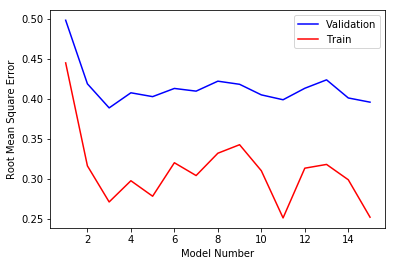

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(X_index, validation_RMSE, "b-",label="Validation")
plt.plot(X_index, train_RMSE, "r-",label="Train")
plt.xlabel("Model Number")
plt.ylabel("Root Mean Square Error")
plt.legend()
plt.show()